# Plotly - CTD locations and details

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
import pandas as pd
import datetime

In [7]:
canonical_files = 'from_historical_lines/bering_canyon.csv'
canonical = pd.read_csv(canonical_files)
canonical['UniqueCruiseID'] = 'Canonical'
canonical['longitude'] = -1 * canonical['LongitudeDecDeg']
canonical.rename(columns={'LatitudeDecDeg':'latitude','Station':'StationNameID'},inplace=True)

castlogs_fromdatabase = '/Users/bell/Downloads/ecofoci_cruises__07-59-32.csv'
castlogs = pd.read_csv(castlogs_fromdatabase)

castlogs['latitude'] = castlogs['LatitudeDeg'] + castlogs['LatitudeMin'] / 60
castlogs['longitude'] = -1 * (castlogs['LongitudeDeg'] + castlogs['LongitudeMin'] / 60 )

In [8]:
castlogs = pd.concat([canonical,castlogs])

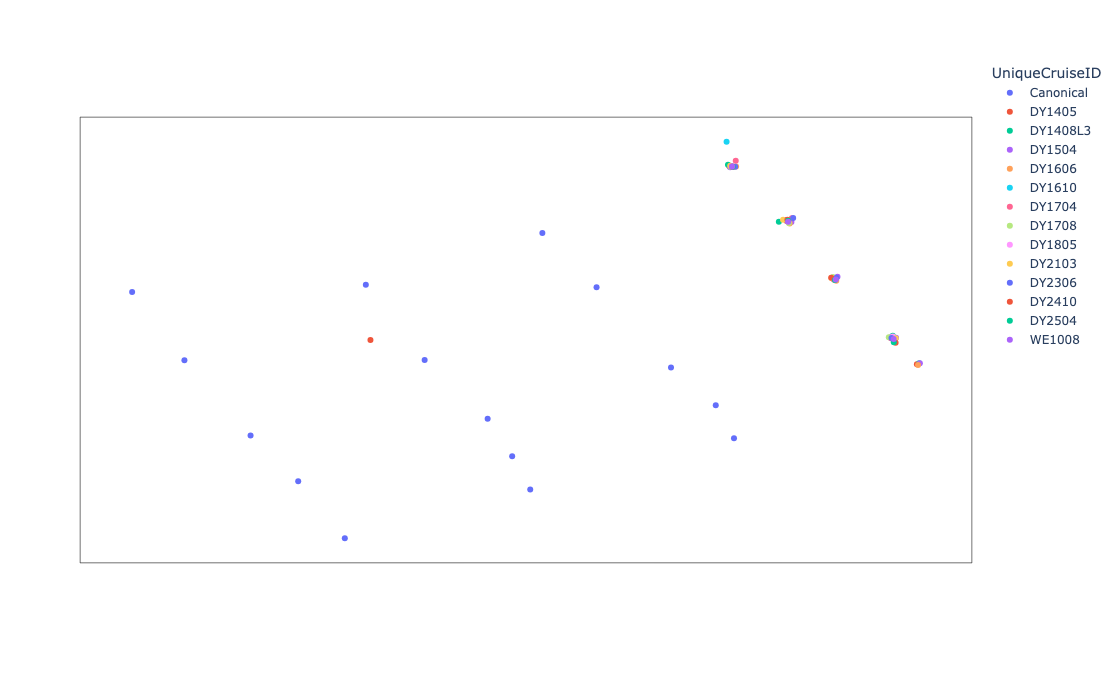

In [9]:
fig = px.scatter_geo(castlogs,
                     lat='latitude',
                     lon='longitude',
                     color='UniqueCruiseID',
                     hover_data=["StationNameID","ConsecutiveCastNo"], 
                     center={'lat': 56.176, 'lon': -160},
                     
                    )
fig.update_layout(height=700)
fig.update_geos(fitbounds="locations")                           # Automatic Zooming !!!!
